
### The House Price Prediction Problem Assignment


In this problem, given a dataset that records the house prices of 9,761 houses in King County, Washington, US. The house prices are recorded along with some other attributes like - area of the house, number of bedrooms, number of bathrooms, etc. You are required to do the following tasks:

In [1]:
import pandas as pd             
import matplotlib.pyplot as plt   
import numpy as np              
import seaborn as sns
import datetime
from datetime import datetime

In [2]:
# Set the working directory
import os
os.chdir(r"C:\Users\RAHUL\Desktop\DS_Monali\IML\IML_Project\docs")

#Read the house_price train data
import pandas as pd
df = pd.read_csv("kc_house_train_data.csv")

In [3]:
df.shape # to know number of rows and columns 

(9761, 21)

9761 signifies number of houses and 21 signifies features of the house

In [44]:
df.columns  #to know all the columns(variables) in dataframe 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [32]:
df.head()  #to display the first 5 rows of the dataframe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014


In [20]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Here as we can see date is object. so we need to extract date from it

Questions:

1. Are there any missing or zero values? is it possible for it to be zero or missing?
2. Is there any relationship between missing values and house price
3. How much are the missing values & what is the %? How are u going to deal with it?
2. Duplicates? do duplicates give any information?

In [4]:
#checking missing values
print(df.isnull().sum()) 

print("")
print("%of missing values")
print("")

#here checking percentage of missing values present in each variable
for column in df.columns: #for each column in data
    null = (sum(df[column].isnull())/len(df[column])) * 100  #calculating % of null values 
    print(column, null) # printing variable name and %of missing values 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

%of missing values

id 0.0
date 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 0.0
view 0.0
condition 0.0
grade 0.0
sqft_above 0.0
sqft_basement 0.0
yr_built 0.0
yr_renovated 0.0
zipcode 0.0
lat 0.0
long 0.0
sqft_living15 0.0
sqft_lot15 0.0


Great! We don't have any missing value.

In [5]:
# checking duplicate rows
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


No duplicate rows found

In [6]:
#Checking if any house is sold more than once
sum(df["id"].value_counts()>1) #taking id because it's the unique feature for every house

40

Yes. 40 houses are sold more than once

### EDA

In [7]:
# making list of categorical variables  out of all variables 
categorical_variables = [variable for variable in df.columns if df[variable].dtypes == 'O'] 
#for each of the variable in df.column, if datatype of variable is equal to object then it will be categorical variable  

print('Number of categorical variables: ', len(categorical_variables ))

# visualising first 5 rows of the categorical variables 
df[categorical_variables ].head()

Number of categorical variables:  1


,date
0,20141209T000000
1,20140512T000000
2,20140527T000000
3,20140528T000000
4,20141007T000000


In [8]:
# making list of numerical variables out of all variables 
numerical_variables = [variable for variable in df.columns if df[variable].dtypes != 'O'] 
#for each of the variable in df.column, if datatype of variable is not equual to object then numerical variable

print('Number of numerical variables: ', len(numerical_variables))

# visualising first 5 rows of the numerical variables
df[numerical_variables].head()

Number of numerical variables:  20


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


Further dividing Numerical variables into discrete and continuous variables

In [9]:
#discrete variables
discrete_variables=[variable for variable in numerical_variables if len(df[variable].unique())<30]
#for each of the variable in numerical_variables, if unique values of variable are less than 30 then it will be a discrete variable  

print("Discrete Variables Count: {}".format(len(discrete_variables))) #printing no of discrete variables 

# visualising first 5 rows of the discrete variables
df[discrete_variables].head() 

Discrete Variables Count: 7


,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,4,3.00,1.0,0,0,5,7
1,4,4.50,1.0,0,0,3,11
2,2,1.00,1.0,0,0,4,7
3,3,1.00,1.5,0,0,4,7
4,3,1.75,1.0,0,0,4,7


In [10]:
#continuous variables
continuous_variables=[variable for variable in numerical_variables if variable not in discrete_variables + ["date"]]
#for each of the variable in numerical_variables, if variable is not in the discrete_variables then it will be a continuous variable  

print("Continuous variables Count {}".format(len(continuous_variables))) #printing no of continuous variables

# visualising first 5 rows of the continuous variables
df[continuous_variables].head() 

Continuous variables Count 13


,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,604000.0,1960,5000,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,1225000.0,5420,101930,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,468000.0,1160,6000,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,310000.0,1430,19901,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,400000.0,1370,9680,1370,0,1977,0,98074,47.6127,-122.045,1370,10208



#### Univariate Analysis

Questions:
1. What is the description of each variable in the data ? 
2. what is the distribution form of every variable? what will be the future reference ?
3. Whether the variable is leptokurtic or platykurtic or mesokurtic?. what will be the future reference ?
4. What is the range of variable? what will be the future reference ?

#Description of each variable
id	-------------->             House id ----->	Numerical- discrete
date-------------->         	Date house was sold	----->  date-time
price  -------------->		    Price of house -----> TARGET ----->  Numerical - continuous
bedrooms -------------->		no of bedrooms per house-----> Numerical- discrete
bathrooms -------------->		no of bathrooms per house ----->	Numerical- discrete
sqft_living-------------->		square feet of the living space ----->	Numerical - continuous
sqft_lot-------------->		    square feet of the land space ----->	Numerical - continuous
floors-------------->		    Total floors (levels) in house ----->	Numerical- discrete
waterfront -------------->	    House which has a view to a waterfront ----->	Categorical- Nominal
view -------------->	        How good the view is -----> 	Categorical- Ordinal
condition -------------->		How good the condition is Overall ----->	Categorical- Ordinal
grade -------------->		    overall grade given to the house ----->	Categorical- Ordinal
sqft_above -------------->		square feet of house apart from basement ----->  Numerical - continuous
sqft_basement -------------->	square feet of the basement ----->	Numerical - continuous
yr_built -------------->		Built Year ----->	Numerical - continuous
yr_renovated -------------->	Year when house was renovated ----->	Numerical - continuous
zipcode -------------->		    zip code----->	Categorical- Nominal
lat -------------->		        Latitude coordinate	 ----->     Numerical - continuous
long -------------->		    Longitude coordinate ----->	Numerical - continuous
sqft_living15 -------------->   Living room area in 2015(implies-- some renovations) -----> Numerical - continuous
sqft_lot15 -------------->		lotSize area in 2015(implies-- some renovations) ----->	Numerical - continuous


In [11]:
#Univariate analysis of discrete variables
df[discrete_variables].describe() #statistical summary

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
count,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000
mean,3.375884,2.117175,1.486067,0.008401,0.248028,3.415531,7.66151
std,0.960697,0.773971,0.532317,0.091275,0.787877,0.650552,1.18268
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000
25%,3.000000,1.750000,1.000000,0.000000,0.000000,3.000000,7.00000
50%,3.000000,2.250000,1.500000,0.000000,0.000000,3.000000,7.00000
75%,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.00000
max,33.000000,8.000000,3.500000,1.000000,4.000000,5.000000,13.00000


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

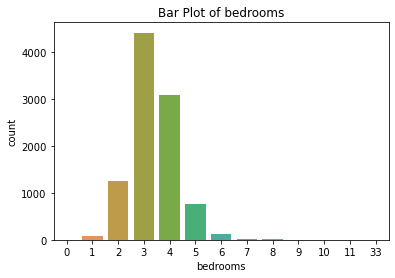

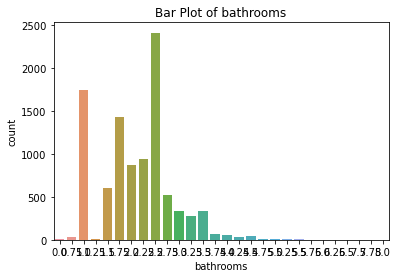

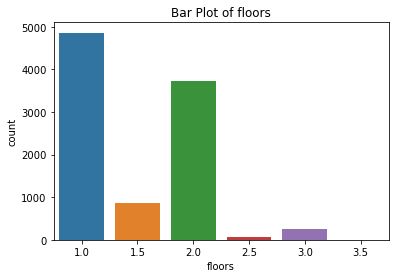

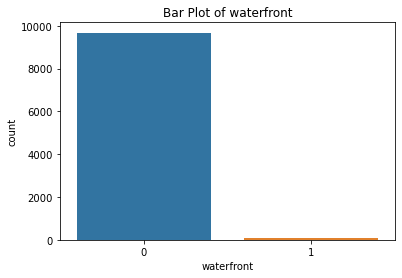

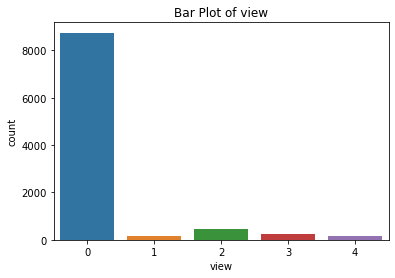

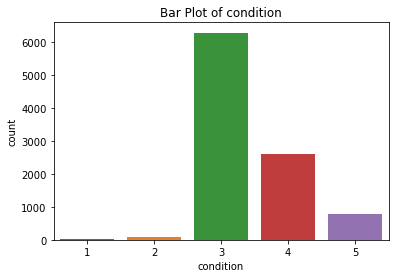

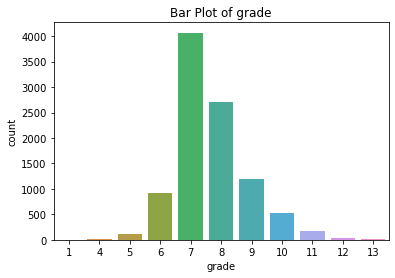

In [12]:
for variable in discrete_variables:          #for each variable in discrete_variables do:
        plt.figure()                          #to create a new figure with customizations
        plt.clf()                             #to clear the entire current figure
        sns.countplot(df[variable]).set_title('Bar Plot of '+ variable) #Plotting barplot for column and Setting up the title
        #df.plot.bar(variable)
        #plt.bar(variable)

In [595]:
#Univariate analysis of continuous variables
df[continuous_variables].describe()  #statistical summary

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,5.427350e+05,2086.734146,1.521526e+04,1793.291159,293.442987,1970.799508,86.066592,47.560052,-122.214322,1992.359697,12824.785165
std,3.795276e+05,927.194303,4.126673e+04,835.763817,442.612722,29.240009,405.417369,0.140236,0.139895,687.322247,26518.337402
min,8.000000e+04,290.000000,5.200000e+02,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.514000,620.000000,660.000000
25%,3.200000e+05,1420.000000,5.100000e+03,1190.000000,0.000000,1951.000000,0.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,4.500000e+05,1910.000000,7.642000e+03,1570.000000,0.000000,1975.000000,0.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,6.490000e+05,2570.000000,1.066000e+04,2230.000000,570.000000,1996.000000,0.000000,47.680400,-122.126000,2370.000000,10113.000000
max,7.700000e+06,12050.000000,1.651359e+06,8860.000000,3480.000000,2015.000000,2015.000000,47.777600,-121.319000,5790.000000,560617.000000


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for id = 0.23544659846813135
Kurtosis for id= -1.2665497134269559


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for price = 4.2980618120838665
Kurtosis for price= 38.92571599487915
skewness for sqft_living = 1.425825591484237


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kurtosis for sqft_living= 4.563590934315643
skewness for sqft_lot = 13.60387975464059
Kurtosis for sqft_lot= 346.54435075031313
skewness for sqft_above = 1.4527483169440447
Kurtosis for sqft_above= 3.404209642036738


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for sqft_basement = 1.4700830337421202
Kurtosis for sqft_basement= 1.709084533795696
skewness for yr_built = -0.46259123825197745


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kurtosis for yr_built= -0.6568681294667256
skewness for yr_renovated = 4.498950793053122
Kurtosis for yr_renovated= 18.245737621987267


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for zipcode = 0.4141588415659435
Kurtosis for zipcode= -0.8401431467176486
skewness for lat = -0.4788661902319015
Kurtosis for lat= -0.709558458526709


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for long = 0.8766953018685205
Kurtosis for long= 1.0304279152773455
skewness for sqft_living15 = 1.1028334076065052
Kurtosis for sqft_living15= 1.5455580439797827


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for sqft_lot15 = 7.755503376203744
Kurtosis for sqft_lot15= 78.870196513143


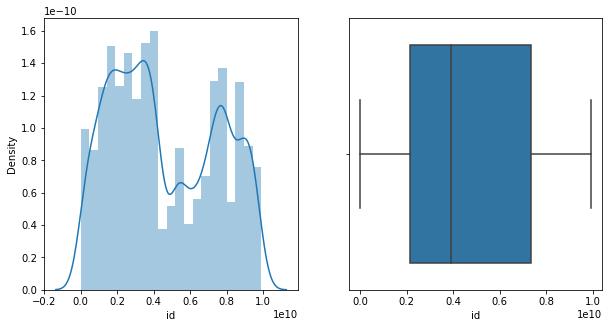

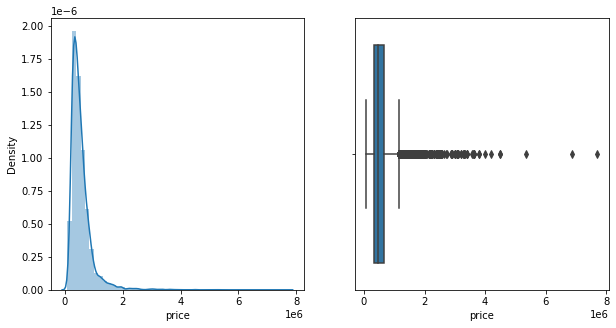

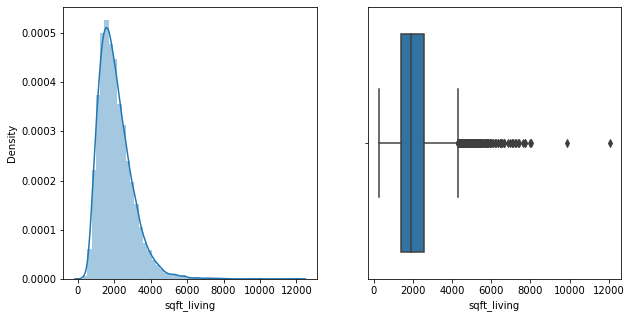

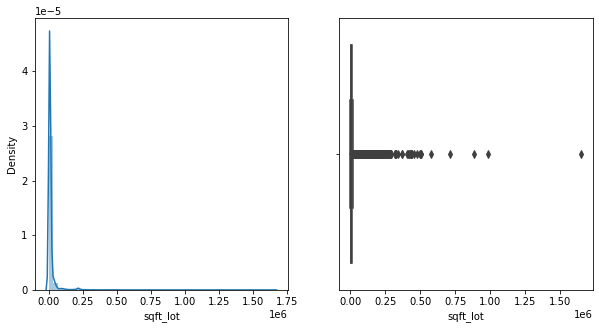

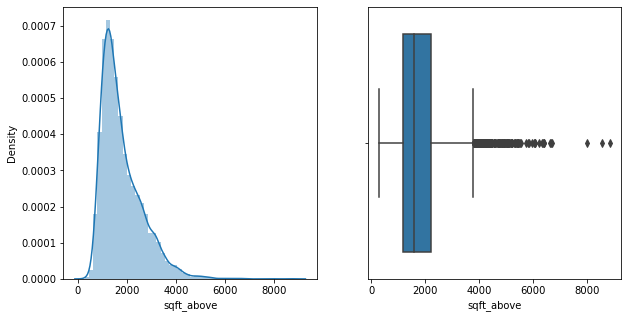

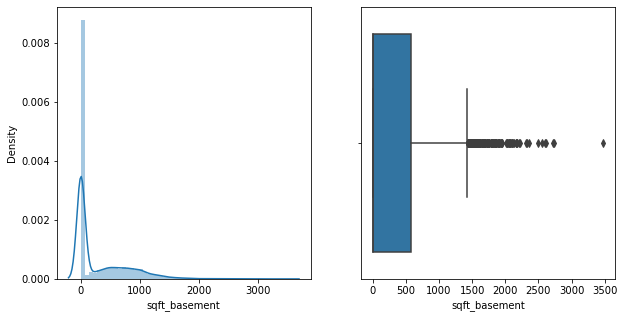

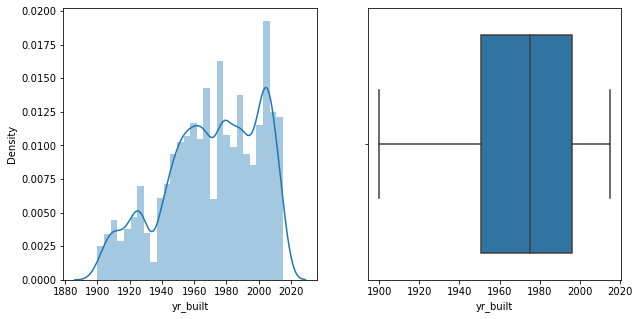

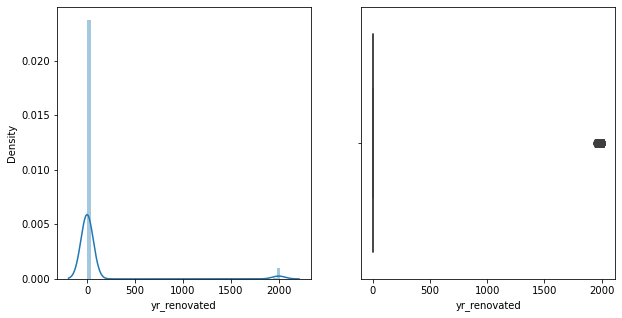

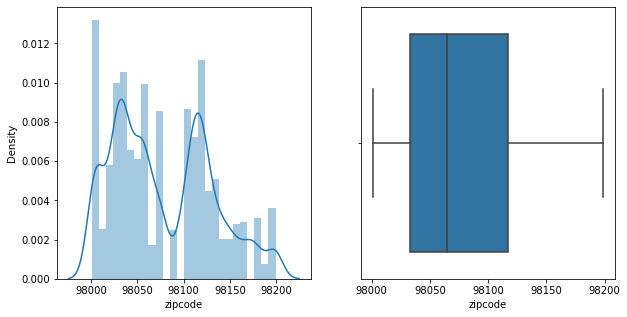

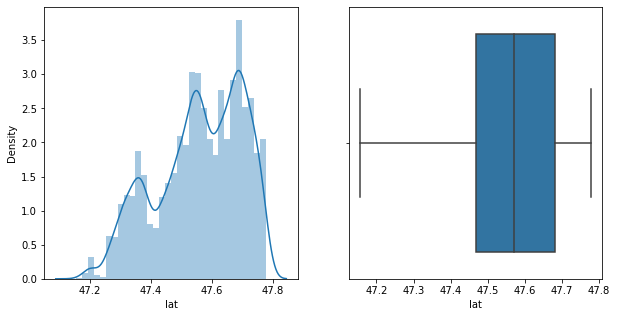

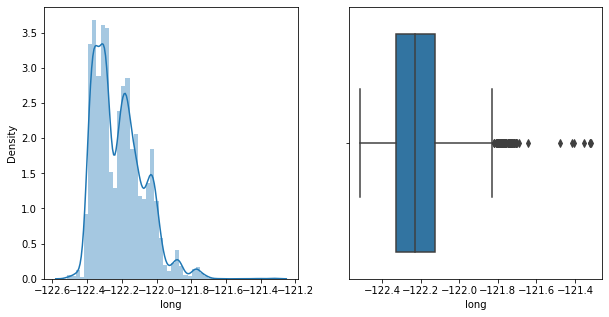

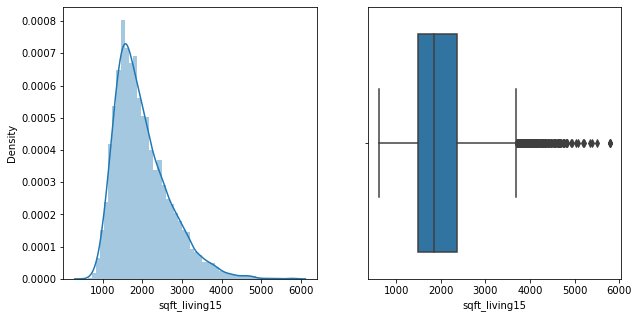

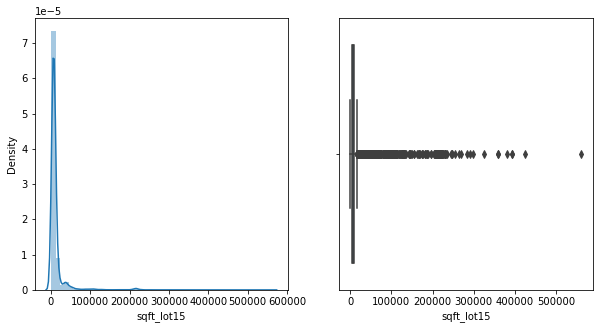

In [13]:
for variable in continuous_variables:          #for each variable in continuous_variables do:
    fig_dims = (10, 5)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
    sns.distplot(df[variable], kde=True, ax=axs[0])   #plot histogram
    sns.boxplot(x= variable, data=df, ax=axs[1])   #plot boxplot
    print("skewness for {} = {}".format(variable, df[variable].skew()))  #print skewness
    print("Kurtosis for {}= {}".format(variable, df[variable].kurtosis()))  #print kurtosis

Analysis:
#### Price


1. Average price is 5.427350e+05   #mean
2. highest price is 7.700000e+06	
3. minimum price is 8.000000e+04
4. 25% of houses have price less than (or 75% of houses have price greater than) 3.200000e+05	
5. 25 % of houses have price higher than ((or 75% of houses have price lesser than)) 6.490000e+05
6. median- 4.500000e+05
7. 50% of houses have price in between 3.200000e+0535 and 6.490000e+05
8. IQR= 329000 #IQR 
9. Lower Fence= 320000- 1.5*329000
10. Upper Fence= 649000 + 1.5*329000
11. skewness for price = 4.2980618120838665   #highly skewed
12. Kurtosis for price= 38.92571599487915   #leptokurtic

13. Distribution is right skewed 

#### Sqft_living

1. Distribution is right skewed
2. skewness for sqft_living = 1.425825591484237  #highly skewed
3. Kurtosis for sqft_living= 4.563590934315643  #leptokurtic

#### sqft_lot
1. right skewed
2. skewness for sqft_lot = 13.60387975464059 #highly skewed
3. Kurtosis for sqft_lot= 346.54435075031313 #leptokurtic

#### sqft_above
1. Right skewed
2. skewness for sqft_above = 1.4527483169440447    #highly skewed
3. Kurtosis for sqft_above= 3.404209642036738     #leptokurtic

#### sqft_basement
1. right skewed
2. skewness for sqft_basement = 1.4700830337421202   #highly skewed
3. Kurtosis for sqft_basement= 1.709084533795696     # platykurtic

#### yr_built
1. Left skewed
2. skewness for yr_built = -0.46259123825197745  #Fairly symmetrical
3. Kurtosis for yr_built= -0.6568681294667256  #platykuric

#### yr_renovated
1. right skewed
2. skewness for yr_renovated = 4.498950793053122  #Highly skewed
3. Kurtosis for yr_renovated= 18.245737621987267  #leptokurtic

#### lat

1. skewness for lat = -0.4788661902319015 #fairly symmetrical
2. Kurtosis for lat= -0.709558458526709 #platykurtic 

#### long
1. Right skewed
2. skewness for long = 0.8766953018685205 #Moderately skewed
3. Kurtosis for long= 1.0304279152773455  #platykurtic

#### sqft_living15
1. Right skewed
2. skewness for sqft_living15 = 1.1028334076065052 #Highly skewed
3. Kurtosis for sqft_living15= 1.5455580439797827 #platykurtic

#### sqft_lot15
1. Right skewed
2. skewness for sqft_lot15 = 7.755503376203744 #Highly skewed
3. Kurtosis for sqft_lot15= 78.870196513143 #leptokurtic

In [14]:
#for date variables:
#date column conversion
df["date"] = df["date"].str.slice(0, 8) # striped only date part 
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d') #converted date string into date
df['yr_sold'] = pd.DatetimeIndex(df['date']).year #extracting year from date for future references
df.head() #display data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014


In [15]:
#Analyzing date time variables
# list of variables that contain year variables
years_variables = [variable for variable in numerical_variables if 'yr' in variable]
years_variables

['yr_built', 'yr_renovated']

In [16]:
# Understanding the year variable
for variable in years_variables:
    print(variable,df[variable].unique())

yr_built [1965 2001 1942 1927 1977 1979 1916 1947 1995 1985 1941 1915 1948 1981
 1996 2014 1959 2003 1966 1953 1955 1950 1954 1989 1968 1973 2005 1956
 2002 1952 1925 1961 1988 1939 1975 1980 1992 1910 1991 2010 1987 1914
 1978 2004 1986 1923 1960 1990 1962 1976 1949 2008 1920 2007 1997 1994
 1993 1999 1983 1904 1940 1928 2006 1937 1982 1969 1929 1957 1964 1913
 1984 1908 1943 1922 1911 1930 1907 2013 1958 1998 1967 1909 1974 1972
 1912 1917 1900 2000 1924 1951 1932 1971 1946 1963 2012 1970 1944 1918
 1905 2009 1936 1926 1906 1902 1938 1919 1903 1921 1931 1901 1933 1945
 2011 1935 2015 1934]
yr_renovated [   0 1992 1994 1978 2005 2008 1984 2014 1974 1983 2013 2003 1945 1990
 1988 1957 1977 1995 2000 1999 1986 2007 1987 1973 2006 2001 1980 1997
 2002 1950 1991 2015 1989 1963 1962 1996 1981 1972 1970 1985 2004 1982
 1993 2010 2011 1971 2009 1998 1969 1940 1976 2012 1946 1964 1975 1953
 1958 1959 1967 1968 1956 1955 1960 1979 1965]


Year renovated = 0 signifies that the house has not been renovated.

#### Bivariate Analysis

#What we think 
1. Sqft_living area -----------------------------> More area more price 
2. bedrooms more------------------------> more price  
3. Bathrooms -------------------------------------> Doesn't impact as much as the bedrooms
4. SQFT lot more ---------------------------------> more price 
5. Age of home------------------------------------> older, cheaper 
6. Recent innovation----->atleast renovated------->not renovated (For old building) 
7. Grading ---------------------------------------> Higher, more price
8. floors ----------------------------------------> More floors more price when the sqft area is good. 
9. water front -----------------------------------> More costly 
10. view ------------------------------------------> good views -->more costly 
11. area (latitude, longitude, zipcode) -----------> good area--> good price 
12. condition-------------------------------------> good condition --> good price
13. sqft_above ----------------------------> more sqft_above ---> good price
14. sqft_basement -------------------------> more sqft_basement----->good price
15. yr_built   --------------------------> older the house------>less price
16. yr_renovated ------------------------> if renovated---> more price 

In [34]:
#Correlation 
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
id,1.000000,-0.005972,-0.002571,0.005821,-0.007559,-0.130303,0.007793,0.000834,0.023355,-0.015321,...,-0.006447,-0.003660,0.027053,-0.024900,-0.012130,0.009167,0.034395,-0.001315,-0.137562,0.011896
price,-0.005972,1.000000,0.300808,0.527532,0.705052,0.094143,0.262954,0.274977,0.399658,0.044732,...,0.611453,0.322383,0.051759,0.120472,-0.055629,0.299280,0.023754,0.584807,0.077943,0.014201
bedrooms,-0.002571,0.300808,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,...,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168,0.376457,0.018149,-0.005814
bathrooms,0.005821,0.527532,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,...,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697,0.566076,0.068722,-0.012303
sqft_living,-0.007559,0.705052,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,...,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170,0.758081,0.163545,-0.016340
sqft_lot,-0.130303,0.094143,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,...,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524,0.145285,0.719922,0.004337
floors,0.007793,0.262954,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,...,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683,0.289238,-0.013269,-0.008066
waterfront,0.000834,0.274977,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,...,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227,0.097196,0.028499,-0.014322
view,0.023355,0.399658,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,...,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630,0.292435,0.079904,0.003450
condition,-0.015321,0.044732,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,...,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514,-0.080423,0.002253,-0.046312


here, price is 
highly correlated with-       sqft_living 
moderate correlation with-    bathrooms	, view	, grade, sqft_above, sqft_living15
weak correlation with-        bedrooms,floors, waterfront, sqft_basement, yr_renovated,lat	
no correlation with-          id, sqft_lot, view, condition	, yr_built, zipcode, long, sqft_lot15, yr_sold

#Surprising points
We see that price and sqft_living has very high correlation as  expected. 
However, sqft_lot, yr_built, yr_sold, condition have no correlation which we thought have higher impact

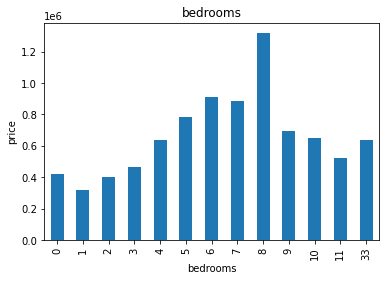

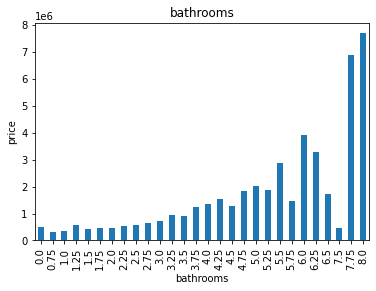

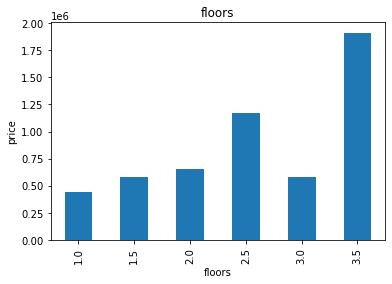

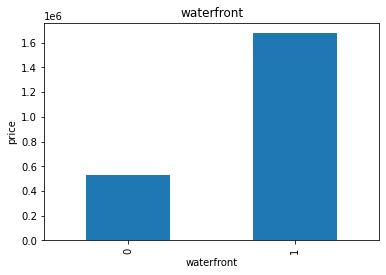

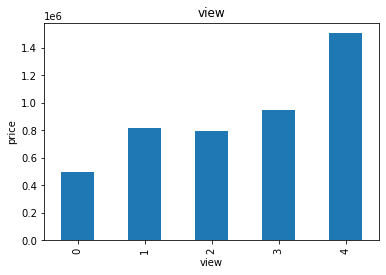

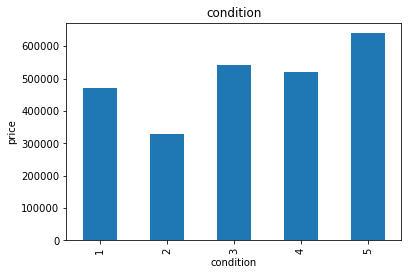

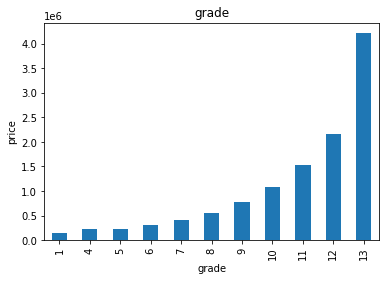

In [35]:
#Bivariate analysis of discrete variables
for variable in discrete_variables:
    df.groupby(variable)['price'].mean().plot.bar()
    plt.xlabel(variable)
    plt.ylabel('price')
    plt.title(variable)
    plt.show()

### Bivariate analysis of each discrete variable with price



#### bedroom 

1. houses with more number of bedrooms have higher price

#### bathrooms

1. houses with more number of bathrooms have higher price

#### floors 


1. as number of floors increases price of house increases (except for 3rd floor)
Q- Do sqft_above plays roll in number of floors? 

#### waterfront 

1. houses with waterfront have higher price

#### View 

1. As the view rating increases price of house also increases
Q- whether houses having waterfront are given higher view rating?

#### condition 

1. houses with higher condition rating (3,4,5) comprise higher prices
Q- Does price of house being high for houses comprising higher condition rating is because of year built ? 

#### Grade 

1. As grade increases price of house is increasing exponentially

In [598]:
#checking floor question
df.groupby('floors').sqft_above.median()

floors
1.0    1260.0
1.5    1540.0
2.0    2320.0
2.5    2730.0
3.0    1490.0
3.5    3910.0
Name: sqft_above, dtype: float64

sqft_above contributing here. sqft_above have more impact rather than floors(from correlation)

<AxesSubplot:xlabel='condition', ylabel='yr_built'>

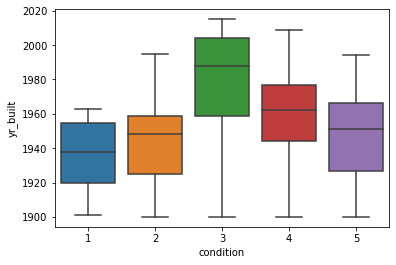

In [599]:
#Checking condition question is true or not
sns.boxplot(x= 'condition', y='yr_built', data= df)

here we can see that houses comprising condition (3,4,5 ) have year built afterward(newer houses)
Hence year built plays role here.
from 3 to 5 we can see that condition rating is higher for earlier built house is it because of renovation? 

<Figure size 576x288 with 0 Axes>

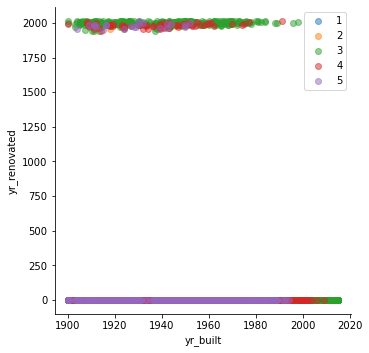

<Figure size 576x288 with 0 Axes>

In [600]:
#checking whether condition rating is correlated with year built and year_renovated both?
g = sns.PairGrid(df,x_vars=['yr_built'],y_vars="yr_renovated",hue= "condition", height=5)
g.map(plt.scatter,alpha=0.5)
plt.legend(loc=(0))
plt.figure(figsize=(8,4))

As we can see in the graph houses with built year earlier which are not renovated has condition rating of 5 
Hence condition is not correlated with year renovated and hence also not with year built.

In [38]:
#checking view question is true or not
df.groupby('waterfront').view.mean()

waterfront
0    0.218824
1    3.695122
Name: view, dtype: float64

as houses with no waterfront have mean rating of ~0 and houses with waterfront have mean rating of ~4,
Waterfront plays role in view rating

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


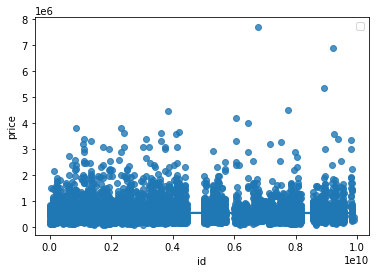

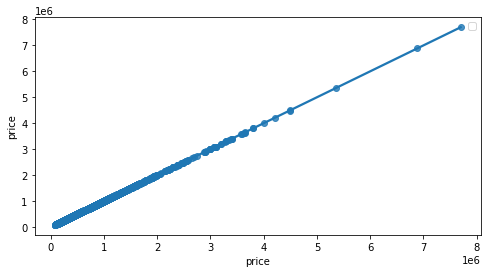

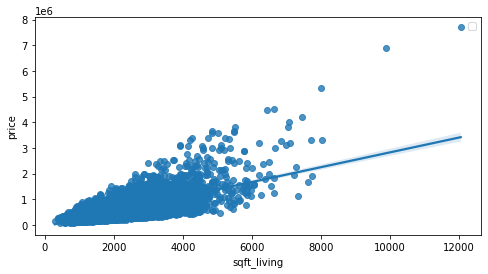

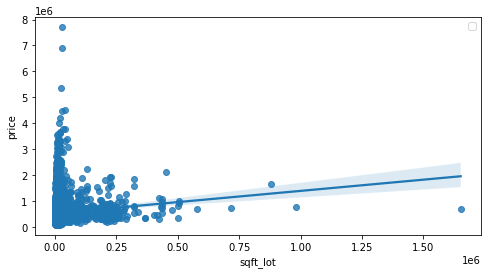

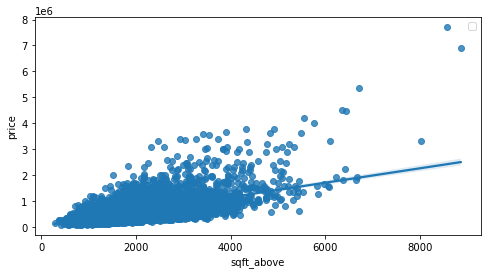

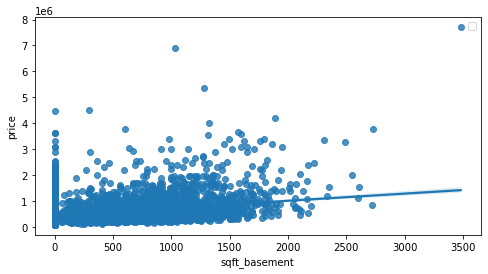

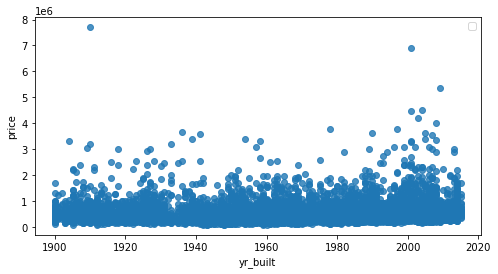

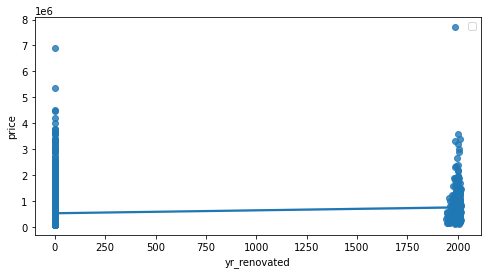

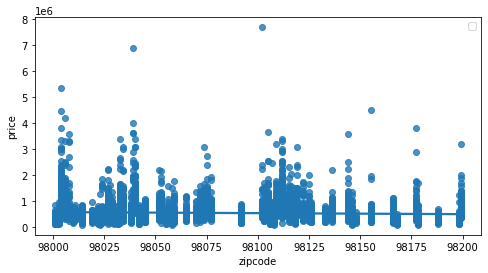

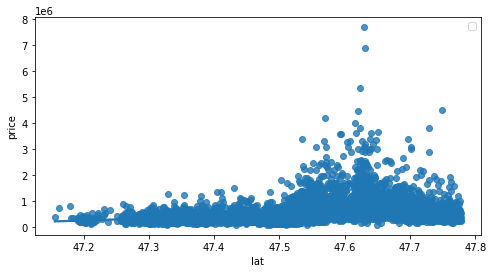

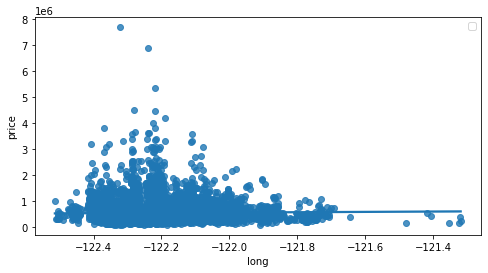

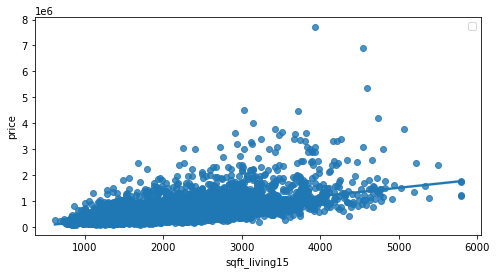

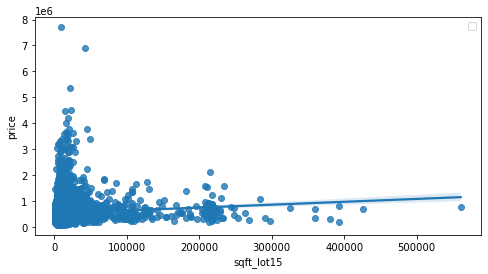

<Figure size 576x288 with 0 Axes>

In [41]:
#Bivariate analysis of continuous variables
for variable in continuous_variables:
    sns.regplot(x= variable, y='price', data=df)
    plt.legend(loc=(0))
    plt.figure(figsize=(8, 4))

### Bivariate analysis of each continuous variable with price

#### sqft_living 

1. As the sqft_living increasing price is also increasing

#### sqft_lot 
1. We did not see much correlation between lot area and price of the house. Here in the scatter plot also, the price seems to be high for the houses with less lot area also.  

#### sqft above 

1. As the sqft_living increasing price is also increasing


#### sqft_basement 

1. As per regression line as sqft_basement increasing price increasing but it's not true for all houses

#### lat 
1. In graph at specific lat, house prices are higher

#### long
1. In graph at specific long, house prices are higher

#### sqft living 15 
1. As the sqft_living15 increasing price is also increasing

#### sqft lot 15 

1. We did not see much correlation between lot area and price of the house. Here in the scatter plot also, the price seems to be high for the houses with less lot area also.  

Text(0.5, 1.0, 'House Price vs Year Sold')

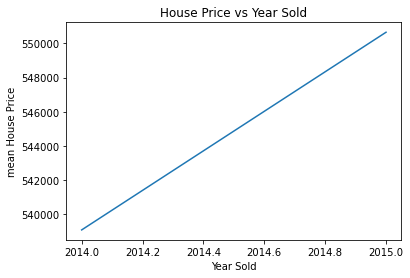

In [42]:
# checking whether there is a relation between year the house is sold and the price

df.groupby('yr_sold')['price'].mean().plot()
plt.xlabel('Year Sold')
plt.ylabel('mean House Price')
plt.title("House Price vs Year Sold")

We can see from the graph as the year increasing house price is also increasing

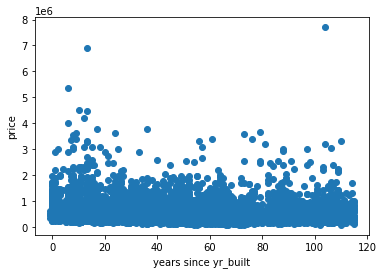

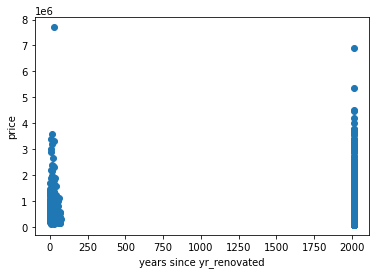

In [43]:
#Analyzing relationship between difference of year variables and year sold with house price(to get age)

for variable in years_variables:
    if variable!='yr_sold':
        data=df.copy()
        ## taking the difference between year variable and year the house was sold for
        data[variable]=data['yr_sold']-data[variable]
        plt.scatter(data[variable],data['price'])
        plt.xlabel('years since ' +  variable)
        plt.ylabel('price')
        plt.show()

Surprising point-
Q- As per our belief The earlier built date of the house result in the lower house price but here newely built also have same prices as earlier built houses have. Is it because earlier built homes are renovated ? 


Q- As per our belief, renovated houses results in higher house price but here houses which are not renovated also have higher prices. Is it because they are newely built?

Selected Features set 1 - bedroom, bathroom,  sqft_living, sqft_living 15, condition, view, grade, sqft_basement, sqft above

### Experiment 1

In [51]:
#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

#For plotting a decision tree
from sklearn import tree

#for cross validation
from sklearn.model_selection import cross_val_score

#for R2 
from sklearn.metrics import r2_score

In [187]:
#set1
Y = df["price"]
X = df[["bedrooms","bathrooms","sqft_living","view", "grade", "sqft_above","sqft_basement","sqft_living15", 'condition']]

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)


reg = DecisionTreeRegressor() # default settings

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_valid)
# Calculating RMSE
RMSE_per = ((np.sum(((y_pred-y_valid)*100/y_valid)**2))/len(y_valid))**0.5
print("RMSE = ", round(RMSE_per,0))

#Calculating MAE here
print("MAE  = ", np.mean(np.abs(y_pred-y_valid)))
#calculating MAPE
print("MAPE = ", np.mean(np.abs((y_valid-y_pred)*100/y_valid)))
 

RMSE =  53.0
MAE  =  187939.626246074
MAPE =  37.47166843852169


In [221]:
#Adding some more features which affect house price according to research - yr_built, location ie lat, yr_sold
Y = df["price"]
X = df[["bedrooms","bathrooms","sqft_living","view", "grade", "sqft_above","sqft_basement",
        "sqft_living15", 'condition','yr_built','lat', 'yr_sold']]

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)


reg = DecisionTreeRegressor() # default settings

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_valid)
# Calculating RMSE
RMSE_per = ((np.sum(((y_pred-y_valid)*100/y_valid)**2))/len(y_valid))**0.5
print("RMSE = ", round(RMSE_per,0))

#Calculating MAE here
print("MAE  = ", np.mean(np.abs(y_pred-y_valid)))
#calculating MAPE
print("MAPE = ", np.mean(np.abs((y_valid-y_pred)*100/y_valid)))

RMSE =  31.0
MAE  =  119394.89696845555
MAPE =  21.336432069719297


In [ ]:
#Errors reduced by considerable amount

In [ ]:
#To further improve our performance we will do Feature Engineering

### Feature Engineering

##### 1. We transforming the variable yr_built to the age of house in years.

In [154]:
data=df.copy()
data["Age"]= data['yr_sold']-data['yr_built']
data.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,13
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,300,1942,0,98115,47.6900,-122.292,1330,6000,2014,72
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,0,1927,0,98028,47.7558,-122.229,1780,12697,2014,87
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,0,1977,0,98074,47.6127,-122.045,1370,10208,2014,37
5,9297300055,2015-01-24,650000.0,4,3.00,2950,5000,2.0,0,3,...,970,1979,0,98126,47.5714,-122.375,2140,4000,2015,36
6,6865200140,2014-05-29,485000.0,4,1.00,1600,4300,1.5,0,0,...,0,1916,0,98103,47.6648,-122.343,1610,4300,2014,98
7,6300500875,2014-05-14,385000.0,4,1.75,1620,4980,1.0,0,0,...,760,1947,0,98133,47.7025,-122.341,1400,4980,2014,67
8,7137970340,2014-07-03,285000.0,5,2.50,2270,6300,2.0,0,0,...,0,1995,0,98092,47.3266,-122.169,2240,7005,2014,19
9,8091400200,2014-05-16,252700.0,2,1.50,1070,9643,1.0,0,0,...,0,1985,0,98030,47.3533,-122.166,1220,8386,2014,29


In [155]:
data=data.drop(['yr_built'],axis=1)

In [156]:
data=data.drop(['date'],axis=1) #we have year sold

#### 2. Converting area

In [157]:
data['yr_sold'].unique()

array([2014, 2015], dtype=int64)

Sqft areas lot and living will be relevant just before they are sold.

There is no point in considering 2014 area for a house sold in 2015

when there is a change in 2015 

So creating a column that has only relevant areas 

In [158]:
s_living=[]
s_lot=[]
j=0
for i in data.yr_sold:
    if i==2014:
        s_living.append(data['sqft_living'][j])
        s_lot.append(data['sqft_lot'][j])
    if i == 2015:
        s_living.append(data['sqft_living15'][j])
        s_lot.append(data['sqft_lot15'][j])
    j+=1
    

In [159]:
s_living=pd.DataFrame(s_living)
s_lot=pd.DataFrame(s_lot)
data['sqliv_relevant']=s_living
data['sqlot_relevant']=s_living

In [160]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,sqliv_relevant,sqlot_relevant
0,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,2014,49,1960,1960
1,7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,...,0,98053,47.6561,-122.005,4760,101930,2014,13,5420,5420
2,9212900260,468000.0,2,1.00,1160,6000,1.0,0,0,4,...,0,98115,47.6900,-122.292,1330,6000,2014,72,1160,1160
3,114101516,310000.0,3,1.00,1430,19901,1.5,0,0,4,...,0,98028,47.7558,-122.229,1780,12697,2014,87,1430,1430
4,6054650070,400000.0,3,1.75,1370,9680,1.0,0,0,4,...,0,98074,47.6127,-122.045,1370,10208,2014,37,1370,1370


#### 3. Feature Transformation for year renovated 

In [161]:
#giving 1 if house is renovated and 0 if not
for i in  range(len(data)):
    if data.yr_renovated.iloc[i]>0:
        data.yr_renovated.iloc[i]=1

C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### 4. Transformations

In [162]:
#### to check whether feature is guassian ie  whethere feature is normal distributed ---using Q-Q plot
#### Q-Q plot
import scipy.stats as stat
import pylab 
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)  #yaxiswill have normally distributed data  
    plt.xlabel(feature) #labeling x axis    
    plt.show()
    #Right hand side plot isQ-Q plot & in this plot, if data falls on a straight line then we say it is in gaussian distribution

In [163]:
data['sqliv_relevant'].skew(), data['sqlot_relevant'].skew()

(1.5176258913178116, 1.5176258913178116)

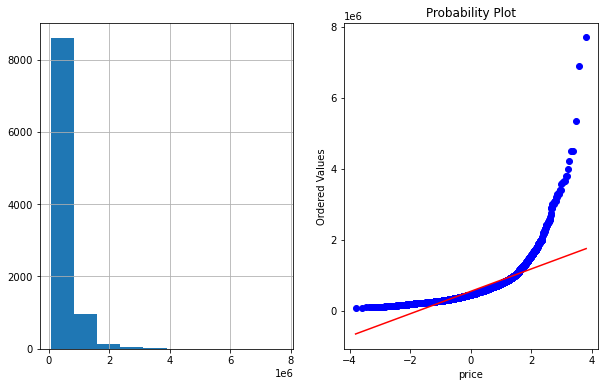

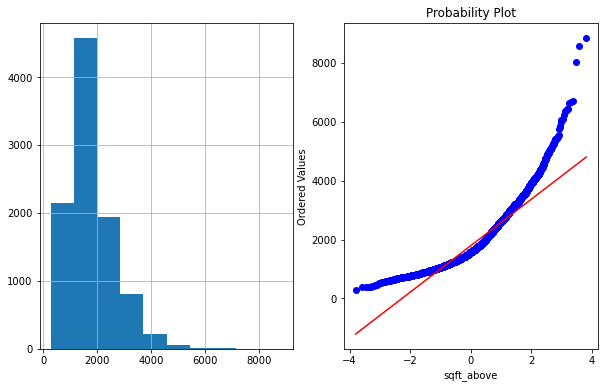

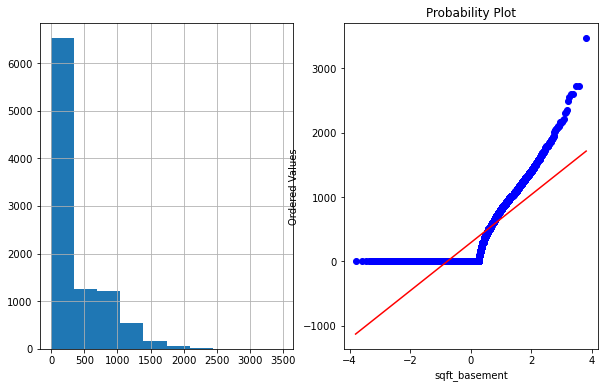

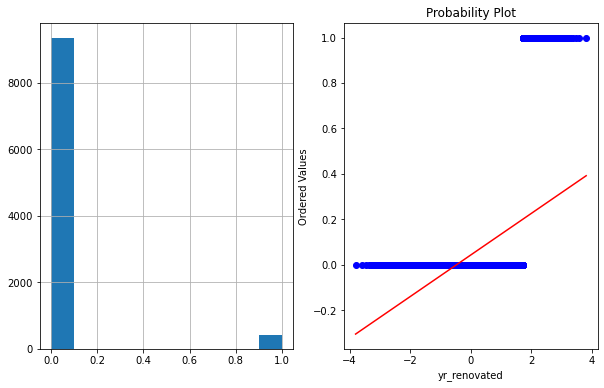

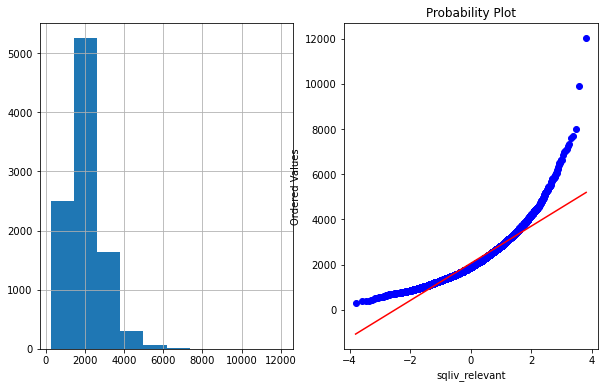

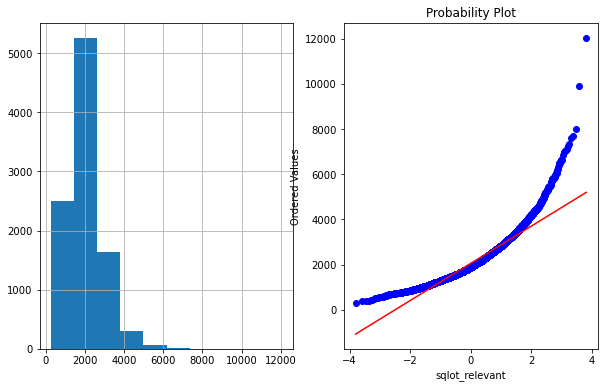

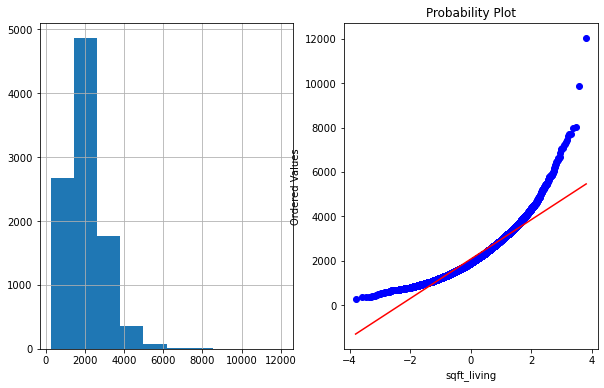

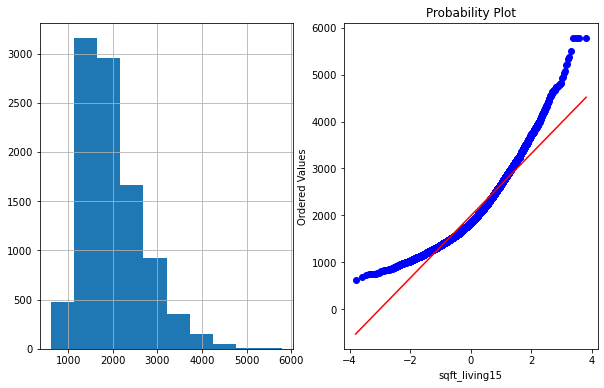

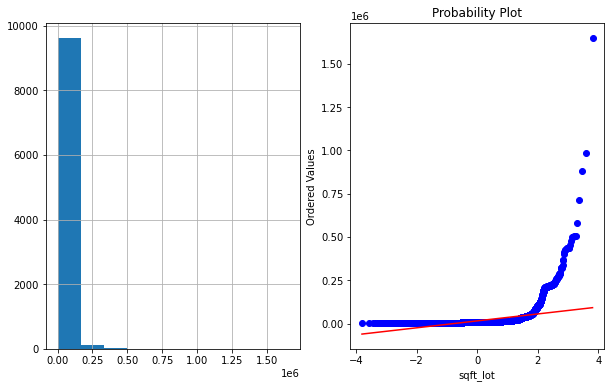

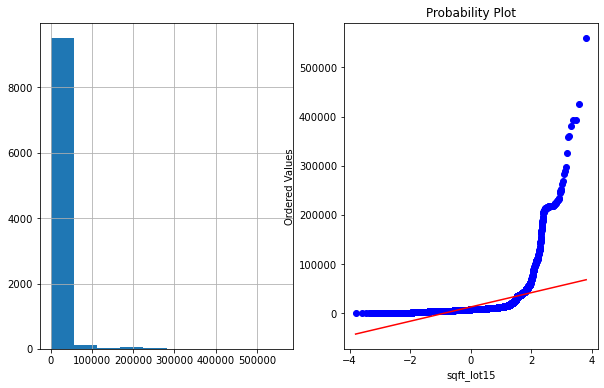

In [169]:
trans= ['price','sqft_above', 'sqft_basement',  'yr_renovated', 'sqliv_relevant', 'sqlot_relevant', "sqft_living", 'sqft_living15', 'sqft_lot', 'sqft_lot15' ]
for variable in trans:
    plot_data(data, variable)
#left side plot indicates initial distribution 
#right side will be probplot 

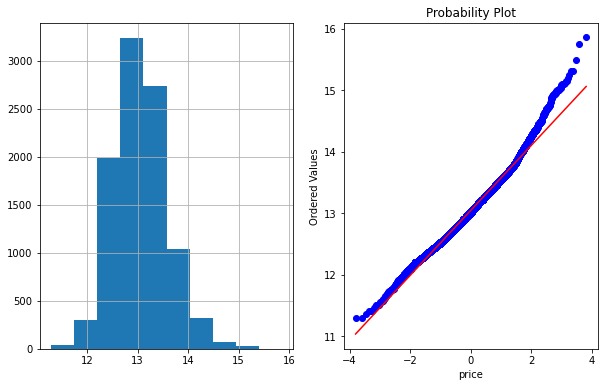

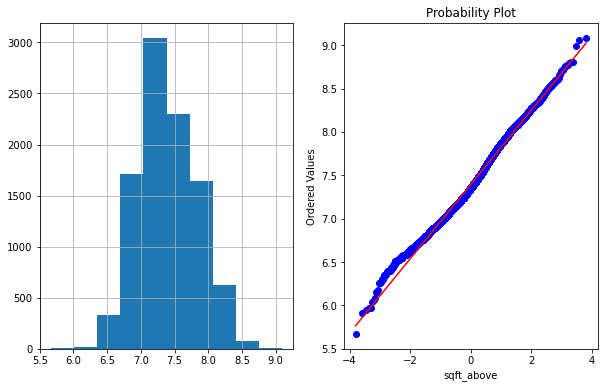

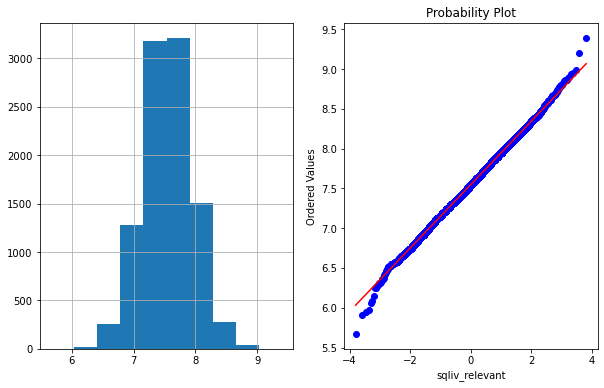

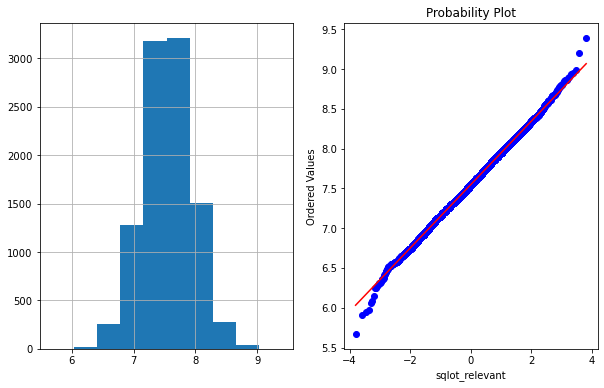

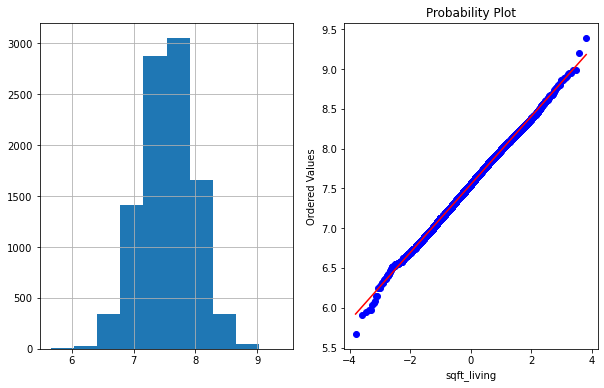

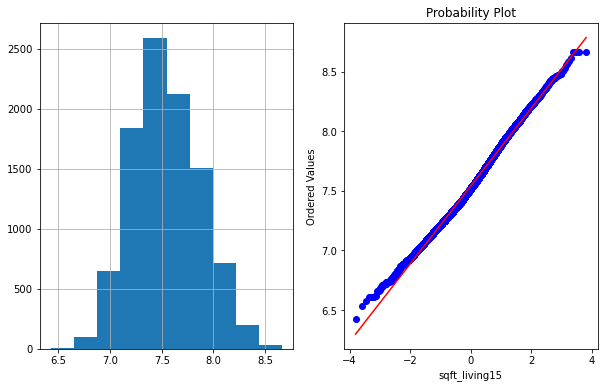

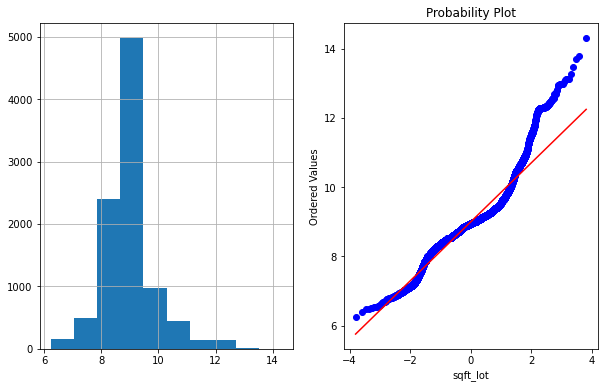

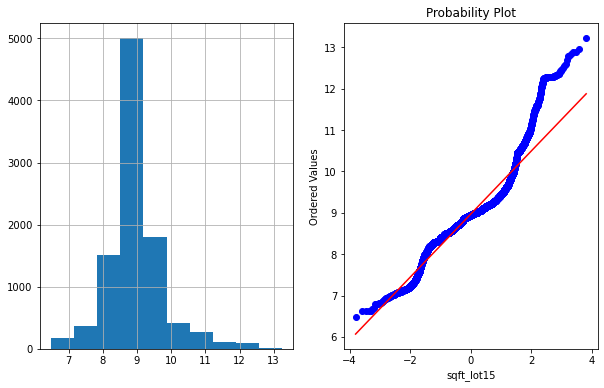

In [170]:
trans= ['price','sqft_above', 'sqft_basement',  'yr_renovated', 'sqliv_relevant', 'sqlot_relevant', "sqft_living", 'sqft_living15', 'sqft_lot', 'sqft_lot15' ]
for variable in trans:
#     data1=data.copy()
    if 0 in data[variable].unique(): #because log of 0 is undefined
        pass
    else:
        data[variable]=np.log(data[variable])  #applying np.log on every feature(because right skewed)
        plot_data(data, variable)

#### 5. Location Transformation

In [165]:
L=data[['price','zipcode']].groupby(['zipcode']).mean()
L=L.sort_values(by='price')
L=L.rank()
data=pd.merge(data,L,on='zipcode')
data.head()

,id,price_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,sqliv_relevant,sqlot_relevant,price_y
0,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,2014,49,1960,1960,41.0
1,9169600135,525000.0,3,1.50,1350,6000,1.0,0,2,3,...,98136,47.5275,-122.391,1730,6012,2014,64,1350,1350,41.0
2,9238901420,442000.0,3,1.00,1190,5100,1.0,0,0,4,...,98136,47.5346,-122.385,1690,5100,2015,74,1690,1690,41.0
3,2490200320,545000.0,3,1.75,1680,6200,1.5,0,0,3,...,98136,47.5338,-122.384,1680,5100,2015,99,1680,1680,41.0
4,2349300060,200000.0,4,2.00,1920,4822,1.0,0,0,2,...,98136,47.5507,-122.381,1120,4822,2015,101,1120,1120,41.0


In [166]:
data=data.rename(columns={'price_x':'price'})
data=data.rename(columns={'price_y':'zip_rank by price'})
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,sqliv_relevant,sqlot_relevant,zip_rank by price
0,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,2014,49,1960,1960,41.0
1,9169600135,525000.0,3,1.50,1350,6000,1.0,0,2,3,...,98136,47.5275,-122.391,1730,6012,2014,64,1350,1350,41.0
2,9238901420,442000.0,3,1.00,1190,5100,1.0,0,0,4,...,98136,47.5346,-122.385,1690,5100,2015,74,1690,1690,41.0
3,2490200320,545000.0,3,1.75,1680,6200,1.5,0,0,3,...,98136,47.5338,-122.384,1680,5100,2015,99,1680,1680,41.0
4,2349300060,200000.0,4,2.00,1920,4822,1.0,0,0,2,...,98136,47.5507,-122.381,1120,4822,2015,101,1120,1120,41.0


In [370]:
data=data.drop(['zipcode'],axis=1)

KeyError: "['zipcode'] not found in axis"

In [371]:
data=data.drop(['id'],axis=1)

#### Fitting model after Feature Engineering

In [246]:
#same features as we have taken before but here with log transformation
Y = data["price"]
X = data[["bedrooms","bathrooms","sqft_living","view", "grade", "sqft_above","sqft_basement",
        "sqft_living15", 'condition','Age','lat', 'yr_sold']]

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)


reg = DecisionTreeRegressor() # default settings

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_valid)
# Calculating RMSE
RMSE_per = ((np.sum(((y_pred-y_valid)*100/y_valid)**2))/len(y_valid))**0.5
print("RMSE = ", round(RMSE_per,0))

#Calculating MAE here
print("MAE  = ", np.mean(np.abs(y_pred-y_valid)))
#calculating MAPE
print("MAPE = ", np.mean(np.abs((y_valid-y_pred)*100/y_valid)))

RMSE =  2.0
MAE  =  0.21310486213537522
MAPE =  1.632096126507411


In [248]:
# Relpacing sqft_living & sqft_living15 by sqft_relevant
Y = data["price"]
X = data[["bedrooms","bathrooms","sqliv_relevant","view", "grade", "sqft_above","sqft_basement",
         'condition','Age','lat', 'yr_sold']]

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)


reg = DecisionTreeRegressor() # default settings

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_valid)
# Calculating RMSE
RMSE_per = ((np.sum(((y_pred-y_valid)*100/y_valid)**2))/len(y_valid))**0.5
print("RMSE = ", round(RMSE_per,0))

#Calculating MAE here
print("MAE  = ", np.mean(np.abs(y_pred-y_valid)))
#calculating MAPE
print("MAPE = ", np.mean(np.abs((y_valid-y_pred)*100/y_valid)))

RMSE =  2.0
MAE  =  0.21881159369872066
MAPE =  1.677100153323293


In [ ]:
#No reduction in error. Quite similar errors but we have reduced 1 features with almost same error
#As of now, not considering sqft_relevant 

In [249]:
#Adding zip_rank by price feature
Y = data["price"]
X = data[["bedrooms","bathrooms","sqliv_relevant","view", "grade", "sqft_above","sqft_basement",
         'condition','Age','lat', 'yr_sold', 'zip_rank by price']]

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)


reg = DecisionTreeRegressor() # default settings

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_valid)
# Calculating RMSE
RMSE_per = ((np.sum(((y_pred-y_valid)*100/y_valid)**2))/len(y_valid))**0.5
print("RMSE = ", round(RMSE_per,0))

#Calculating MAE here
print("MAE  = ", np.mean(np.abs(y_pred-y_valid)))
#calculating MAPE
print("MAPE = ", np.mean(np.abs((y_valid-y_pred)*100/y_valid)))

RMSE =  2.0
MAE  =  0.19341458572687567
MAPE =  1.4840488853926823


In [272]:
#Removing lat feature because we have added zip_rank
Y = data["price"]
X = data[["bedrooms","bathrooms","sqliv_relevant","view", "grade", "sqft_above","sqft_basement",
         'condition','Age', 'yr_sold', 'zip_rank by price']]

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)


reg = DecisionTreeRegressor() # default settings

reg.fit(X_train,y_train)

#predicting values for y_valid
y_pred = reg.predict(X_valid)
# Calculating RMSE
RMSE_per = ((np.sum(((y_pred-y_valid)*100/y_valid)**2))/len(y_valid))**0.5
print("RMSE = ", round(RMSE_per,0))

#Calculating MAE here
print("MAE  = ", np.mean(np.abs(y_pred-y_valid)))
#calculating MAPE
print("MAPE = ", np.mean(np.abs((y_valid-y_pred)*100/y_valid)))

RMSE =  2.0
MAE  =  0.19581041269280275
MAPE =  1.5026631910932933


In [ ]:
#when we have only lat, error is more than having only zip_rank hence zip_rank is contributing more towards price
#when we have both error is less but not that small so considering zip_rank only

##### Using cross validation to choose best value of depth

In [296]:
X_train = data[["bedrooms","bathrooms","sqliv_relevant","view", "grade", "sqft_above","sqft_basement",
         'condition','Age', 'yr_sold', 'zip_rank by price']] 
y_train = data.price

In [297]:
depth = np.arange(1,15) #depth in range of 1 to 15
cv_scores = [] #empty list that will hold cv_scores

# performing 10-fold cross validation
for k in depth: #for each depth in depth from 1 to 15
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5) #regression tree model
    score= cross_val_score(reg_tree, X_train, y_train, cv=10, scoring ="neg_mean_squared_error" ) #10 fold cross validation
    #used mean squared error, mse as a scoring metric 
    cv_scores.append(score.mean()) #appending mean of all scores for specific cross validation in cv_scores

In [298]:
#Calculating RMSE
RMSE= [np.sqrt(-score) for score in cv_scores]  #used -score because mse retuen negative value 
RMSE

[0.4222821395565419,
 0.3437681033855962,
 0.3073087480636466,
 0.28140481121731575,
 0.2616180018092333,
 0.2506602893329812,
 0.2397872869074944,
 0.2351367219560422,
 0.2316449557895516,
 0.23277257922384553,
 0.2332809120282211,
 0.236120659771252,
 0.2380362808974133,
 0.23996908067675993]

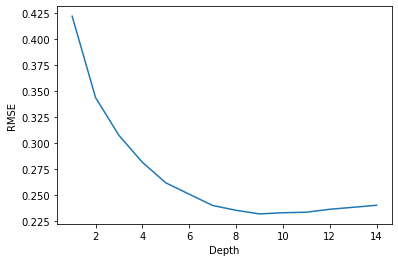

In [299]:
# plot RMSE vs depth
plt.plot(depth, RMSE)
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.show()

In [ ]:
# choosing depth as 7,8,9

###### Final Testing

In [423]:
#Read the house_price test data
df_test = pd.read_csv("kc_house_test_data.csv")

In [424]:
#for date variables:
#date column conversion
df_test["date"] = df_test["date"].str.slice(0, 8) # striped only date part 
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y%m%d') #converted date string into date
df_test['yr_sold'] = pd.DatetimeIndex(df_test['date']).year #extracting year from date for future references
df_test.head() #display data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015
1,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0,0,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,2015
2,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0,0,...,1200,0,1921,0,98002,47.3089,-122.210,1060,5095,2014
3,461000390,2014-06-24,687500.0,4,1.75,2330,5000,1.5,0,0,...,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,2014
4,7895500070,2015-02-13,240000.0,4,1.00,1220,8075,1.0,0,0,...,890,330,1969,0,98001,47.3341,-122.282,1290,7800,2015


In [425]:
#Doing Feature engineering as we have performed for train data
# data=df.copy()
df_test["Age"]= df_test['yr_sold']-df_test['yr_built']
df_test.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age
0,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,0,2003,0,98038,47.3684,-122.031,2390,7570,2015,12
1,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0,0,...,0,1900,0,98107,47.6700,-122.394,1360,4850,2015,115
2,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0,0,...,0,1921,0,98002,47.3089,-122.210,1060,5095,2014,93
3,461000390,2014-06-24,687500.0,4,1.75,2330,5000,1.5,0,0,...,820,1929,0,98117,47.6823,-122.368,1460,5000,2014,85
4,7895500070,2015-02-13,240000.0,4,1.00,1220,8075,1.0,0,0,...,330,1969,0,98001,47.3341,-122.282,1290,7800,2015,46


In [426]:
s_living=[]
s_lot=[]
j=0
for i in df_test.yr_sold:
    if i==2014:
        s_living.append(df_test['sqft_living'][j])
        s_lot.append(df_test['sqft_lot'][j])
    if i == 2015:
        s_living.append(df_test['sqft_living15'][j])
        s_lot.append(df_test['sqft_lot15'][j])
    j+=1
    

In [427]:
s_living=pd.DataFrame(s_living)
s_lot=pd.DataFrame(s_lot)
df_test['sqliv_relevant']=s_living
df_test['sqlot_relevant']=s_living

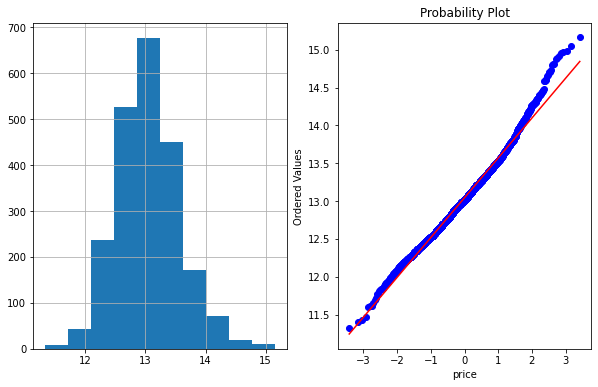

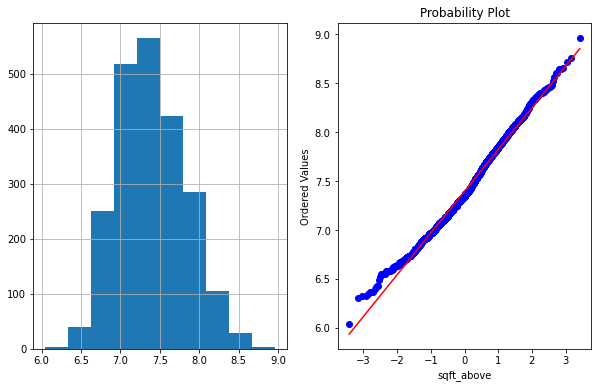

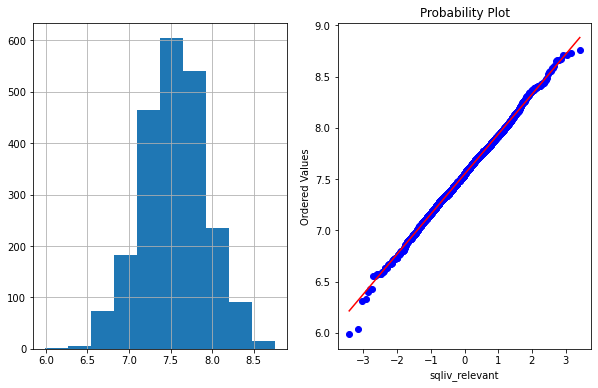

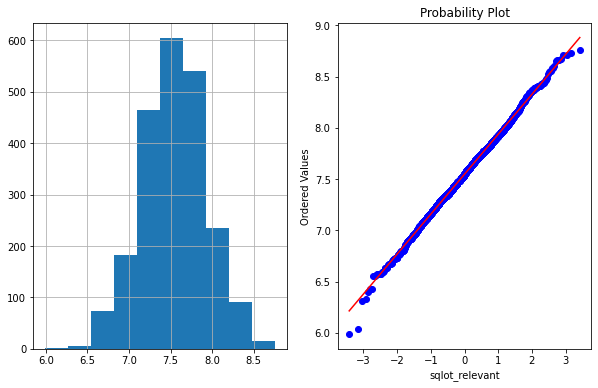

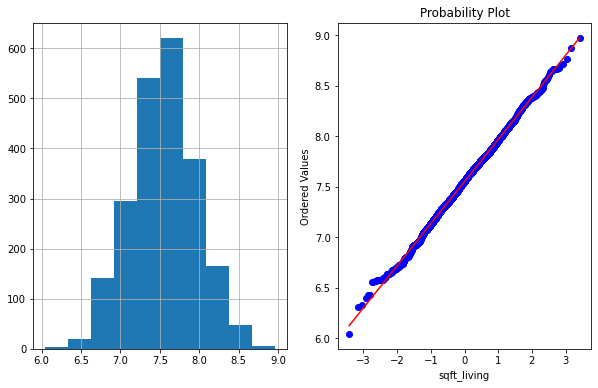

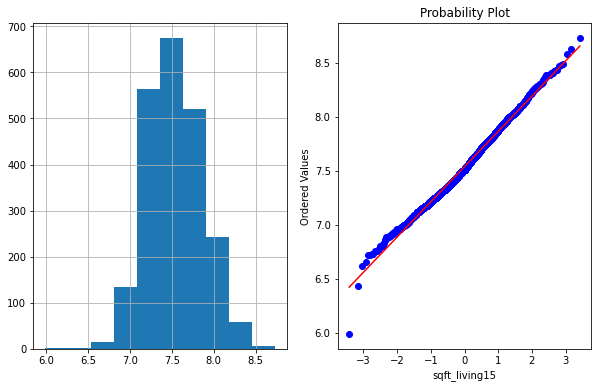

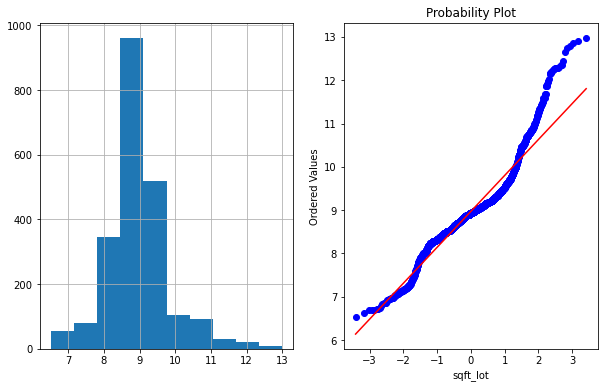

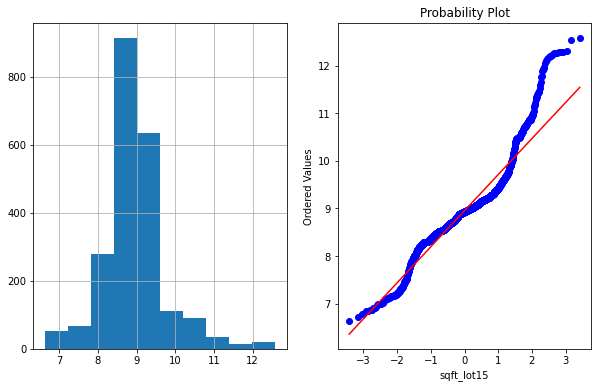

In [428]:
trans= ['price','sqft_above', 'sqft_basement',  'yr_renovated', 'sqliv_relevant', 'sqlot_relevant', "sqft_living", 'sqft_living15', 'sqft_lot', 'sqft_lot15' ]
for variable in trans:
#     data1=data.copy()
    if 0 in df_test[variable].unique(): #because log of 0 is undefined
        pass
    else:
        df_test[variable]=np.log(df_test[variable])  #applying np.log on every feature(because right skewed)
        plot_data(df_test, variable)

In [429]:
L=df_test[['price','zipcode']].groupby(['zipcode']).mean()
L=L.sort_values(by='price')
L=L.rank()
df_test=pd.merge(df_test,L,on='zipcode')
df_test.head()

,id,date,price_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,sqliv_relevant,sqlot_relevant,price_y
0,3793500160,2015-03-12,12.685408,3,2.5,7.544332,8.788746,2.0,0,0,...,98038,47.3684,-122.031,7.779049,8.931948,2015,12,7.779049,7.779049,20.0
1,5416510830,2014-08-06,12.611538,4,2.5,7.554859,8.489205,2.0,0,0,...,98038,47.3607,-122.034,7.605890,8.535230,2014,9,7.554859,7.554859,20.0
2,1545808560,2015-04-03,12.409013,3,2.5,7.333023,9.047821,1.0,0,0,...,98038,47.3592,-122.046,7.522941,9.004545,2015,19,7.522941,7.522941,20.0
3,4123840310,2015-01-06,12.744027,3,2.5,7.501082,8.554874,2.0,0,0,...,98038,47.3724,-122.042,7.501082,8.732305,2015,22,7.501082,7.501082,20.0
4,2322069114,2014-10-10,12.569510,3,1.0,6.956545,9.683464,1.0,0,0,...,98038,47.3841,-122.006,7.383989,10.225571,2014,54,6.956545,6.956545,20.0


In [430]:
df_test=df_test.rename(columns={'price_x':'price'})
df_test=df_test.rename(columns={'price_y':'zip_rank by price'})
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,sqliv_relevant,sqlot_relevant,zip_rank by price
0,3793500160,2015-03-12,12.685408,3,2.5,7.544332,8.788746,2.0,0,0,...,98038,47.3684,-122.031,7.779049,8.931948,2015,12,7.779049,7.779049,20.0
1,5416510830,2014-08-06,12.611538,4,2.5,7.554859,8.489205,2.0,0,0,...,98038,47.3607,-122.034,7.605890,8.535230,2014,9,7.554859,7.554859,20.0
2,1545808560,2015-04-03,12.409013,3,2.5,7.333023,9.047821,1.0,0,0,...,98038,47.3592,-122.046,7.522941,9.004545,2015,19,7.522941,7.522941,20.0
3,4123840310,2015-01-06,12.744027,3,2.5,7.501082,8.554874,2.0,0,0,...,98038,47.3724,-122.042,7.501082,8.732305,2015,22,7.501082,7.501082,20.0
4,2322069114,2014-10-10,12.569510,3,1.0,6.956545,9.683464,1.0,0,0,...,98038,47.3841,-122.006,7.383989,10.225571,2014,54,6.956545,6.956545,20.0


In [431]:
# #Separating predictors & target
y_test = df_test["price"]
X_test = df_test[["bedrooms","bathrooms","sqliv_relevant","view", "grade", "sqft_above","sqft_basement",
         'condition','Age', 'yr_sold', 'zip_rank by price']]

reg = DecisionTreeRegressor(max_depth=7) 

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_test)
# Calculating RMSE
RMSE_per = ((np.sum(((y_pred-y_test)*100/y_test)**2))/len(y_test))**0.5
print("RMSE = ", round(RMSE_per,0))

#Calculating MAE here
print("MAE  = ", np.mean(np.abs(y_pred-y_test)))
#calculating MAPE
print("MAPE = ", np.mean(np.abs((y_test-y_pred)*100/y_test)))

RMSE =  2.0
MAE  =  0.1880390395280532
MAPE =  1.4415543363173156


In [432]:
#max_depth=8
reg = DecisionTreeRegressor(max_depth=8) 

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_test)
# Calculating RMSE
RMSE_per = ((np.sum(((y_pred-y_test)*100/y_test)**2))/len(y_test))**0.5
print("RMSE = ", round(RMSE_per,0))

#Calculating MAE here
print("MAE  = ", np.mean(np.abs(y_pred-y_test)))
#calculating MAPE
print("MAPE = ", np.mean(np.abs((y_test-y_pred)*100/y_test)))

RMSE =  2.0
MAE  =  0.18453088408365173
MAPE =  1.4147717684089725


In [433]:
#max_depth=9
reg = DecisionTreeRegressor(max_depth=9) 

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_test)
# Calculating RMSE
RMSE_per = ((np.sum(((y_pred-y_test)*100/y_test)**2))/len(y_test))**0.5
print("RMSE = ", round(RMSE_per,0))

#Calculating MAE here
print("MAE  = ", np.mean(np.abs(y_pred-y_test)))
#calculating MAPE
print("MAPE = ", np.mean(np.abs((y_test-y_pred)*100/y_test)))

RMSE =  2.0
MAE  =  0.18262501718687013
MAPE =  1.3998886408359934


In [434]:
#best depth=8

#### Linear Regression

In [518]:
# #Separating predictors & target
X_train_l = data[["bedrooms","bathrooms","sqliv_relevant","view", "grade", "sqft_above","sqft_basement",
         'condition','Age', 'yr_sold', 'zip_rank by price']]

In [520]:
y_train_l = data["price"]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


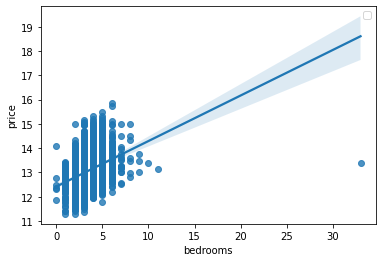

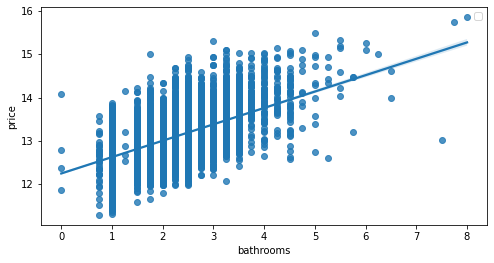

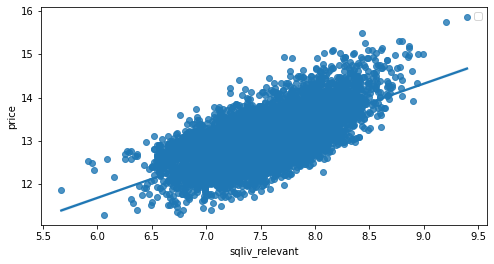

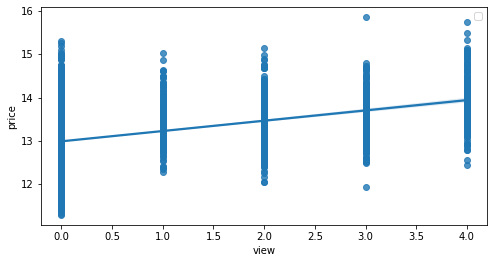

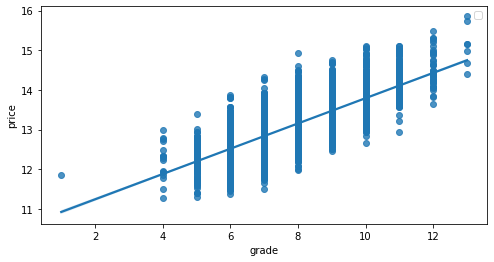

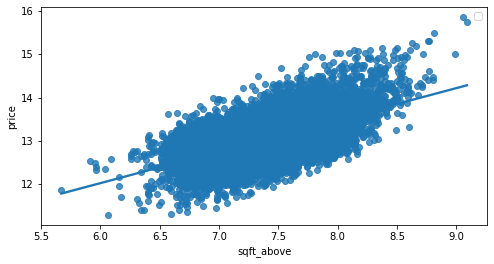

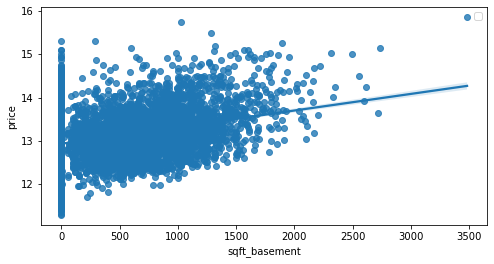

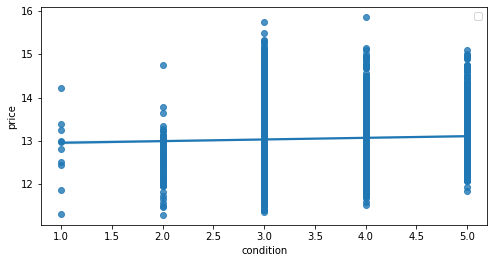

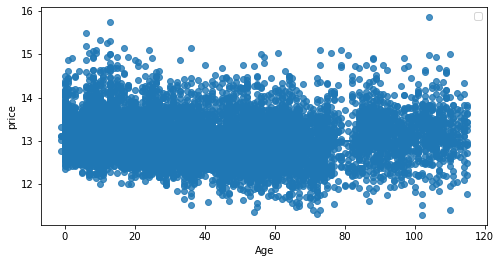

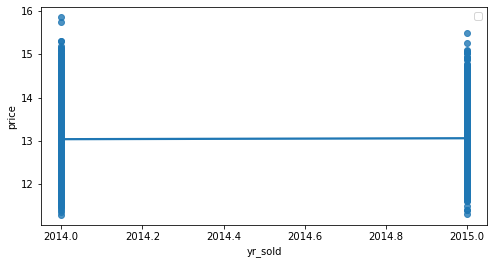

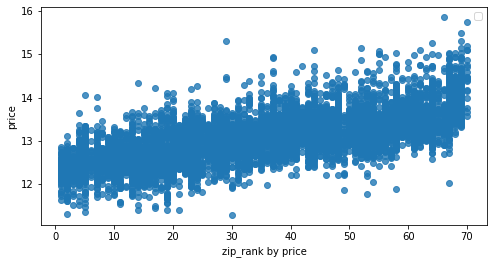

<Figure size 576x288 with 0 Axes>

In [521]:
#1. checking x & Y are independent of one another
for variable in X_train_l:
    sns.regplot(x= variable, y=data['price'], data=X_train_l)
    plt.legend(loc=(0))
    plt.figure(figsize=(8, 4))

In [522]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [534]:
#Performing standardScaling transformation
data1=X_train_l.copy()
# df_x=data1.drop(['price'],axis=1)
# df_x

In [535]:
x=data1.copy()
arr= scaler.fit_transform(x)
arr

array([[ 0.6496828 ,  1.14070136,  0.07621199, ...,  0.18753958,
        -0.68010382,  0.31191752],
       [-1.43224557, -1.44350729, -1.05135174, ...,  0.70057362,
         1.47036375, -0.37382115],
       [ 0.6496828 ,  0.4946492 ,  0.21309397, ..., -1.24895572,
        -0.68010382,  0.15367014],
       ...,
       [ 1.69064699,  1.46372745,  0.97032695, ...,  1.31621446,
        -0.68010382,  1.57789661],
       [-0.39128138,  1.46372745, -0.32517994, ..., -1.24895572,
         1.47036375,  1.57789661],
       [ 2.73161117,  7.27819692,  4.13367752, ..., -1.04374211,
        -0.68010382,  1.84164226]])

In [536]:
x=pd.DataFrame(arr)
x

,0,1,2,3,4,5,6,7,8,9,10
0,0.649683,1.140701,0.076212,-0.314821,-0.559360,-1.022458,1.393066,2.435701,0.187540,-0.680104,0.311918
1,-1.432246,-1.443507,-1.051352,-0.314821,-1.404940,-1.135857,-0.663013,-0.638769,0.700574,1.470364,-0.373821
2,0.649683,0.494649,0.213094,-0.314821,-0.559360,0.555124,-0.663013,-0.638769,-1.248956,-0.680104,0.153670
3,0.649683,1.463727,1.682521,-0.314821,2.822962,2.160528,-0.663013,-0.638769,-1.009540,1.470364,-0.110076
4,1.690647,-0.474429,-0.095826,-0.314821,-0.559360,-1.000428,1.076746,0.898466,0.290146,-0.680104,-1.270556
...,...,...,...,...,...,...,...,...,...,...,...
9756,0.649683,-0.474429,0.126856,3.493074,-0.559360,-1.135857,1.596414,2.435701,0.495360,-0.680104,1.577897
9757,-0.391281,0.494649,-0.821560,-0.314821,1.131801,-0.404169,-0.663013,-0.638769,2.171271,-0.680104,1.577897
9758,1.690647,1.463727,0.970327,-0.314821,1.977381,0.368151,1.347877,2.435701,1.316214,-0.680104,1.577897
9759,-0.391281,1.463727,-0.325180,-0.314821,0.286220,-0.387265,0.037409,-0.638769,-1.248956,1.470364,1.577897


In [358]:
#2. Checking Multicollinearity using VIF(1/(1-r2))

In [537]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [538]:
arr.shape #to know columns

(9761, 11)

In [539]:
arr.shape[1] #to extract number of columns

11

In [540]:
VIF=[]
for i in range (arr.shape[1]):
    VIF.append(variance_inflation_factor(arr,i))
VIF

[1.6743305929142271,
 2.95998395574824,
 6.470609174299212,
 1.1848698031894926,
 3.174079611304209,
 7.728909014070386,
 2.683691871927576,
 1.1810997301377524,
 1.8331735702468235,
 1.0040600958091377,
 1.2682102208600676]

In [541]:
vif_df= pd.DataFrame() #creating dataframe vif
vif_df['vif']=VIF
vif_df['feature']=data1.columns
vif_df

,vif,feature
0,1.674331,bedrooms
1,2.959984,bathrooms
2,6.470609,sqliv_relevant
3,1.184870,view
4,3.174080,grade
5,7.728909,sqft_above
6,2.683692,sqft_basement
7,1.181100,condition
8,1.833174,Age
9,1.004060,yr_sold


In [ ]:
# we don't have hard multicollinearity

In [542]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [543]:
lr.fit(x,y_train_l)

LinearRegression()

In [544]:
#test data
df_test

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,sqliv_relevant,zip_rank by price
0,12.685408,3,2.50,8.788746,2.0,0,0,3,7,7.544332,...,0,98038,47.3684,-122.031,7.779049,8.931948,2015,12,7.779049,20.0
1,12.611538,4,2.50,8.489205,2.0,0,0,3,7,7.554859,...,0,98038,47.3607,-122.034,7.605890,8.535230,2014,9,7.554859,20.0
2,12.409013,3,2.50,9.047821,1.0,0,0,5,7,6.937314,...,0,98038,47.3592,-122.046,7.522941,9.004545,2015,19,7.522941,20.0
3,12.744027,3,2.50,8.554874,2.0,0,0,3,8,7.501082,...,0,98038,47.3724,-122.042,7.501082,8.732305,2015,22,7.501082,20.0
4,12.569510,3,1.00,9.683464,1.0,0,0,4,7,6.956545,...,1981,98038,47.3841,-122.006,7.383989,10.225571,2014,54,6.956545,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,14.253765,2,2.25,9.654577,1.0,0,0,4,8,7.352441,...,1986,98039,47.6209,-122.236,7.630461,9.896211,2014,72,7.989560,70.0
2213,14.018451,4,2.50,9.680781,2.0,0,0,3,9,7.915713,...,0,98039,47.6353,-122.229,7.922986,9.680844,2014,30,7.915713,70.0
2214,14.731801,4,4.50,9.895657,2.0,0,0,3,11,8.366370,...,1999,98039,47.6218,-122.237,8.029433,9.895707,2014,29,8.366370,70.0
2215,14.801327,5,3.00,9.925494,2.0,0,0,4,11,8.364042,...,0,98039,47.6217,-122.239,8.194229,10.013462,2014,29,8.364042,70.0


In [546]:
# #Separating predictors & target
y_test_l = df_test["price"]
X_test_l = df_test[["bedrooms","bathrooms","sqliv_relevant","view", "grade", "sqft_above","sqft_basement",
         'condition','Age', 'yr_sold', 'zip_rank by price']]

In [547]:
x_test=X_test_l.copy()
arr= scaler.fit_transform(x_test)
arr
x_test=pd.DataFrame(arr)
x_test

,0,1,2,3,4,5,6,7,8,9,10
0,-0.407847,0.529438,0.592937,-0.301143,-0.563284,0.346508,-0.665398,-0.620331,-1.060424,1.414214,-0.812276
1,0.745466,0.529438,0.017181,-0.301143,-0.563284,0.371123,-0.665398,-0.620331,-1.162105,-0.707107,-0.812276
2,-0.407847,0.529438,-0.064788,-0.301143,-0.563284,-1.072990,0.514350,2.385734,-0.823169,1.414214,-0.812276
3,-0.407847,0.529438,-0.120925,-0.301143,0.305749,0.245369,-0.665398,-0.620331,-0.721488,1.414214,-0.812276
4,-0.407847,-1.451041,-1.519382,-0.301143,-0.563284,-1.028018,-0.665398,0.882701,0.363106,-0.707107,-0.812276
...,...,...,...,...,...,...,...,...,...,...,...
2212,-1.561160,0.199358,1.133565,-0.301143,0.305749,-0.102225,2.614302,0.882701,0.973190,-0.707107,1.798812
2213,0.745466,0.529438,0.943913,-0.301143,1.174782,1.214974,-0.665398,-0.620331,-0.450340,-0.707107,1.798812
2214,0.745466,3.170076,2.101273,-0.301143,2.912848,2.268825,-0.665398,-0.620331,-0.484233,-0.707107,1.798812
2215,1.898779,1.189597,2.095293,-0.301143,2.912848,2.263380,-0.665398,0.882701,-0.484233,-0.707107,1.798812


In [548]:
y_hat= lr.predict(x_test)
y_hat
yhat=pd.DataFrame(y_hat)
yhat

,0
0,12.719117
1,12.638589
2,12.662399
3,12.846365
4,12.484760
...,...
2212,13.813300
2213,13.766722
2214,14.330901
2215,14.238836


In [549]:
yhat

,0
0,12.719117
1,12.638589
2,12.662399
3,12.846365
4,12.484760
...,...
2212,13.813300
2213,13.766722
2214,14.330901
2215,14.238836


In [551]:
lr.score(x_test, y_test_l) #r2

0.8314767416158504

In [554]:
#Defining function for adjusted r2
def adj_r2(x,y):
    r2=lr.score(x,y)
    n=x.shape[0] #no of predictors
    p=x.shape[1] #no of rows
    adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))
    return(adjusted_r2)

In [555]:
adj_r2(x_test, y_test_l)

0.8306360360184691

In [ ]:
#adjusted r2 is lesser than r2
#Actual accuracy = 83.06

In [557]:
#to know actual equation
lr.coef_

array([-0.00962539,  0.05390258,  0.02806633,  0.06380336,  0.14998935,
        0.12489918,  0.05515133,  0.01772168,  0.08724274,  0.022378  ,
        0.25810637])

In [558]:
lr.intercept_

13.048645080852154

In [565]:
#RMSE   Root mean squared error
np.sqrt(np.mean((y_test_l - y_hat)**2))

0.21708050944218757

In [566]:
import numpy as np
np.exp(y_hat)

array([ 334073.70505284,  308226.1827013 ,  315653.04085367, ...,
       1674292.33315822, 1527030.47906055, 1512843.41265403])